In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states
import os
import numpy as np
import config

In [2]:
algae_mgd = pd.read_csv("../data/algae_pts_with_tracts.csv")

In [3]:
algae_mgd.columns

Index(['Unnamed: 0', 'uid', 'latitude', 'longitude', 'date', 'split',
       'geometry', 'index_right', 'index', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON'],
      dtype='object')

In [4]:
c = Census(config.census_api)
states

<module 'us.states' from 'c:\\Users\\Jennah\\anaconda3\\envs\\bloom\\lib\\site-packages\\us\\states.py'>

In [5]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [6]:
census_dfs = []
for i in state_codes:
    census_dfs.append(c.acs5.state_county_tract(fields = ('NAME', 'B19019_001E', 'B02001_001E', 'B16009_002E', 'B01003_001E', 'B02001_002E', 'B02001_003E',
                                                          'B02001_003E', 'B02001_005E', 'B03001_003E', 'B19113_001E'),
                                      state_fips = state_codes[i],
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2019))

In [7]:
census_df = pd.concat([pd.DataFrame(x) for x in census_dfs], axis=0).rename({'B19019_001E': 'median_household_income',
                                                                             'B19113_001E': 'median_family_income',
                                                                             'B02001_001E': 'total_pop_race',
                                                                             'B16009_002E': 'poverty',
                                                                             'B01003_001E': 'total_pop',
                                                                             'B02001_002E': 'white',
                                                                             'B02001_003E': 'black',
                                                                             'B02001_005E': 'asian',
                                                                             'B03001_003E': 'hispanic_latino'
                                                                             }, axis=1)
census_df

,NAME,median_household_income,total_pop_race,poverty,total_pop,white,black,asian,hispanic_latino,median_family_income,state,county,tract
0,"Census Tract 416, Clark County, Washington",37083.0,3486.0,606.0,3486.0,2282.0,351.0,80.0,1033.0,50326.0,53,011,041600
1,"Census Tract 430, Clark County, Washington",61771.0,1993.0,164.0,1993.0,1706.0,41.0,96.0,444.0,62969.0,53,011,043000
2,"Census Tract 408.05, Clark County, Washington",98911.0,6981.0,510.0,6981.0,6362.0,48.0,224.0,300.0,104000.0,53,011,040805
3,"Census Tract 404.03, Clark County, Washington",92546.0,4204.0,292.0,4204.0,3967.0,115.0,63.0,174.0,101750.0,53,011,040403
4,"Census Tract 406.04, Clark County, Washington",88561.0,5810.0,301.0,5810.0,4852.0,79.0,253.0,651.0,89848.0,53,011,040604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,"Census Tract 9659, Clay County, South Dakota",32385.0,6131.0,1592.0,6131.0,5223.0,221.0,205.0,239.0,65192.0,46,027,965900
218,"Census Tract 9543.01, Codington County, South ...",40701.0,4577.0,882.0,4577.0,4226.0,43.0,45.0,71.0,66458.0,46,029,954301
219,"Census Tract 9543.02, Codington County, South ...",79727.0,5098.0,189.0,5098.0,4914.0,127.0,34.0,34.0,84488.0,46,029,954302
220,"Census Tract 9545.01, Codington County, South ...",49348.0,2492.0,433.0,2492.0,2243.0,8.0,7.0,130.0,64625.0,46,029,954501


In [8]:
census_df['poverty_rate'] = census_df['poverty'] / census_df['total_pop']

<Axes: >

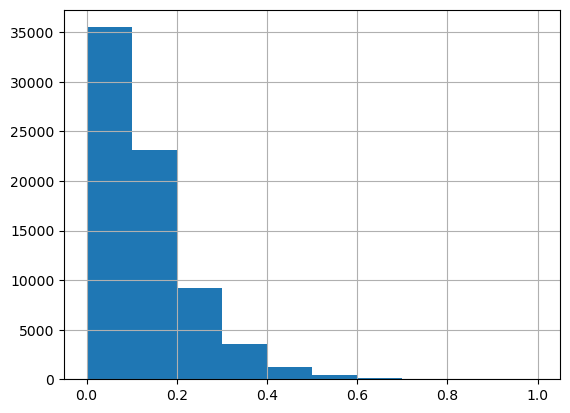

In [10]:
census_df['poverty_rate'].hist()

In [11]:
census_dfs_state = []
for i in state_codes:
    census_dfs_state.append(c.acs5.state(fields = ('NAME', 'B19019_001E', 'B02001_001E', 'B16009_002E', 'B01003_001E', 'B02001_002E', 'B02001_003E',
                                                          'B02001_003E', 'B02001_005E', 'B03001_003E', 'B19113_001E'),
                                      state_fips = state_codes[i],
                                      year = 2019))

In [12]:
census_state = pd.concat([pd.DataFrame(x) for x in census_dfs], axis=0).rename({'B19019_001E': 'median_household_income_state',
                                                                             'B19113_001E': 'median_family_income_state',
                                                                             'B02001_001E': 'total_pop_race_state',
                                                                             'B16009_002E': 'poverty_state',
                                                                             'B01003_001E': 'total_pop_state',
                                                                             'B02001_002E': 'white_state',
                                                                             'B02001_003E': 'black_state',
                                                                             'B02001_005E': 'asian_state',
                                                                             'B03001_003E': 'hispanic_latino_state',
                                                                             }, axis=1)
census_state

,NAME,median_household_income_state,total_pop_race_state,poverty_state,total_pop_state,white_state,black_state,asian_state,hispanic_latino_state,median_family_income_state,state,county,tract
0,"Census Tract 416, Clark County, Washington",37083.0,3486.0,606.0,3486.0,2282.0,351.0,80.0,1033.0,50326.0,53,011,041600
1,"Census Tract 430, Clark County, Washington",61771.0,1993.0,164.0,1993.0,1706.0,41.0,96.0,444.0,62969.0,53,011,043000
2,"Census Tract 408.05, Clark County, Washington",98911.0,6981.0,510.0,6981.0,6362.0,48.0,224.0,300.0,104000.0,53,011,040805
3,"Census Tract 404.03, Clark County, Washington",92546.0,4204.0,292.0,4204.0,3967.0,115.0,63.0,174.0,101750.0,53,011,040403
4,"Census Tract 406.04, Clark County, Washington",88561.0,5810.0,301.0,5810.0,4852.0,79.0,253.0,651.0,89848.0,53,011,040604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,"Census Tract 9659, Clay County, South Dakota",32385.0,6131.0,1592.0,6131.0,5223.0,221.0,205.0,239.0,65192.0,46,027,965900
218,"Census Tract 9543.01, Codington County, South ...",40701.0,4577.0,882.0,4577.0,4226.0,43.0,45.0,71.0,66458.0,46,029,954301
219,"Census Tract 9543.02, Codington County, South ...",79727.0,5098.0,189.0,5098.0,4914.0,127.0,34.0,34.0,84488.0,46,029,954302
220,"Census Tract 9545.01, Codington County, South ...",49348.0,2492.0,433.0,2492.0,2243.0,8.0,7.0,130.0,64625.0,46,029,954501


In [20]:
from segregation.aspatial import MultiDissim
from tqdm import tqdm
census_df['dissim'] = census_df.apply(lambda x: MultiDissim(x, ['white', 'black']).statistic, axis=0)


In [33]:
#MultiDissim(census_df.iloc[0,:].dropna(), ['white', 'black']).statistic
census_df.iloc[0,:]

NAME                       Census Tract 416, Clark County, Washington
median_household_income                                       37083.0
total_pop_race                                                 3486.0
poverty                                                         606.0
total_pop                                                      3486.0
white                                                          2282.0
black                                                           351.0
asian                                                            80.0
hispanic_latino                                                1033.0
median_family_income                                          50326.0
state                                                              53
county                                                            011
tract                                                          041600
poverty_rate                                                 0.173838
dissim              

In [37]:
from segregation.aspatial import Dissim, GiniSeg
d_index = GiniSeg(census_df.tail(5), "black", "total_pop_race")
d_index.statistic

0.44763697631919364